##### Discente: Gabriele de Sousa Araújo

# Article - Comprehensive Study of a Diabetes Mellitus Mathematical Model Using Numerical Methods with Stability and Parametric Analysis

-  https://doi.org/10.3390/ijerph20020939


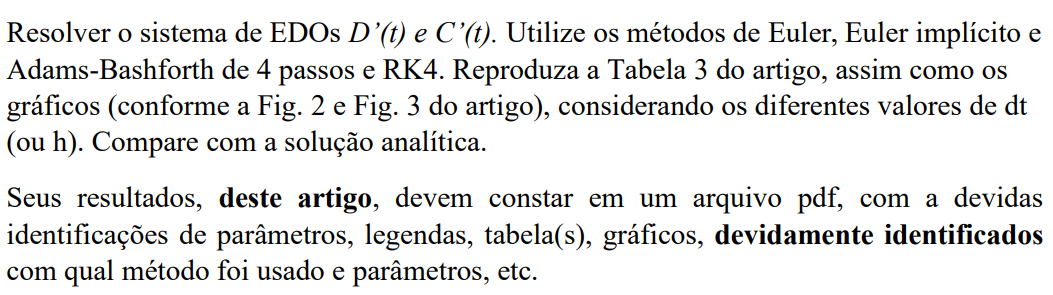

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# D'(t) = (dD(t)/dt) = I -(lamda+u)D(t) + y*C(t)
# C'(t) = (dC(t)/dt) = I + lamda*D(t) - (y + u + v + d1)*C(t)

## Condições Iniciais

In [3]:
y0=(90210290.2097902, 155769730.76923075) #Valor inicial definido a partir da analítica 
dom=200
a=0
b=100
t0 = 0
h = 0.5 #passo 
dom = 200  #dom
I = 6 * 10**6
p = 0.85 #mesmo que lambda do outro artigo
v = 0.05
delta = 0.05
u = 0.02
gama = 0.5

#Intervalo de tempo
t = np.arange(t0, t0 + dom, h)
n = len(t)

400

In [4]:
theta =  gama + u + v + delta
sigma = p + theta + u
b = p*v + p*delta + p*u + u*theta

n1 = (1/2)*(sigma - np.sqrt(sigma**2 - 4*b))
n2 = (1/2)*(sigma + np.sqrt(sigma**2 - 4*b))

C0 = (((2*p + u)*I)/(v*p + u*theta + p*delta + p*u)) + 500
N0 = ((((2*(p+theta) - u+ delta))*I)/(v*p + u*theta + p*delta + p*u)) + 500
y0 = np.array([C0, N0])

a = 2*p + u
K1 = (b*(p + theta - n2)*C0 + I*(a*n2 - b) - p*b*N0)/(b*(n1-n2))
K2 = (-b*(p + theta - n1)*C0 + I*(b - a*n1) + p*b*N0)/(b*(n1-n2))

## Funções

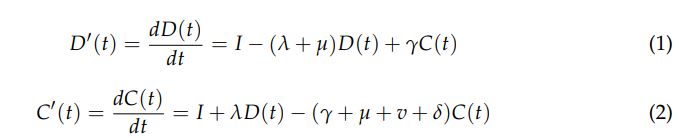

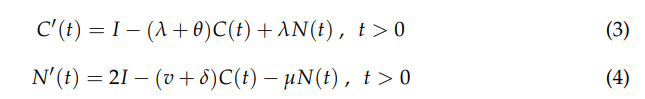


In [5]:
# # Função que representa as equações diferenciais
def f(t, y):
    Ct, Nt = y
    dCdt = I - (p + theta) * Ct + p * Nt
    dNdt = 2 * I - (v + delta) * Ct - u * Nt
    return np.array([dCdt, dNdt])

In [6]:
#Analíticas
def analitica(t,y):

  Ct = (K1*np.exp(-n1*t)) + (K2*np.exp(-n2*t)) + ((a/b)*I)
  Nt = Ct + ((theta/p)*K1*np.exp(-n1*t)) + ((theta/p)*K2*np.exp(-n2*t)) + (((theta*a)/(p*b))*I) - (I/p) - ((1/p)*(n1*K1*np.exp(-n1*t)+n2*K2*np.exp(-n2*t)))

  return Ct, Nt

# Definindo os métodos

In [7]:
#Método de Euler
def euler(t, y0, h):
    n = len(t)
    y = np.zeros((n, 2))
    y[0] = y0
    for i in range(n - 1):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return y

#Método de Runge-Kutta de quarta ordem
def runge_kutta(t, y0, h, n):
#     n = len(t)
    y = np.zeros((n, 2))
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

# # Método Adams-Bashforth 4 passos
def rk4_ (f, t, y, h, n) :
    for _ in range (n) :
        k1 = h * f (t , y )
        k2 = h * f ( t + 0.5* h , y + 0.5* k1 )
        k3 = h * f ( t + 0.5* h , y + 0.5* k2 )
        k4 = h * f ( t + h , y + k3 )
        y += ( k1 + 2* k2 + 2* k3 + k4 ) / 6
        t +=h
    return y

def Adams_Bashforth(t, y0, h):
    n = len(t)
    y = np.zeros((n, 2))
    y[0] = y0

    for i in range(0, 3):
        y[i + 1] = rk4_(f, t[i], y[i], h, 2)
        
    K3 = f(t[0], y[0])
    K2 = f(t[1], y[1])
    K1 = f(t[2], y[2])
    K0 = f(t[3], y[3])  
    for i in range(3, n - 1):
        K3 = K3
        K2 = K2
        K1 = K1
#         # Adams-Bashforth 3 passos
#         y[i + 1] = y[i] + h * (23 * K1 - 16 * K2 + 5 * K3) / 12
        K0 = K0
#         y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24 #Adams-Moulton 4 passos
        # Adams-Bashforth 4 passos
        y[i + 1] = y[i] + h * (55 * K0 - 59 * K1 + 37 * K2 - 9 * K3) / 24

    return y

# # Preditor-Corretor
def Adams_Bashforth_Moulton(t, y0, h):
    n = len(t)
    y = np.zeros((n + 1, 2))
    y[0] = y0
    
    for i in np.arange (0 , 3):
        y[i + 1] = rk4_(f, t[i], y[i], h, 2)
    
    K1 = f(t[1], y[1])
    K2 = f(t[0], y[0])
    for i in range(2, len(t) - 1):
        K3 = K2
        K2 = K1
        K1 = f(t[i], y[i])
        # Adams-Bashforth Predictor
        y[i + 1] = y[i] + h * (23 * K1 - 16 * K2 + 5 * K3) / 12
        K0 = f(t[i + 1], y[i + 1])
        # Adams-Moulton Corrector
        y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24
    return y

In [8]:
#Chamando as funções
euler_result = euler(t, y0, h)
runge_kutta_result = runge_kutta(t, y0, h, n)
adams_bashforth_result = Adams_Bashforth(t, y0, h)
Adams_Bashforth_Moulton_result = Adams_Bashforth_Moulton(t, y0, h)
analitic1, analitic2 = analitica(t, y0)

### Criando dataframe

In [9]:
#Dataframe
results_df = pd.DataFrame.from_dict({
    'Tempo': t,
    'Euler-Ct': euler_result[:, 0],
    'Euler-Nt': euler_result[:, 1],
    'Runge-Kutta-Ct': runge_kutta_result[:, 0],
    'Runge-Kutta-Nt': runge_kutta_result[:, 1],
    'Adams_Bashforth-Ct': adams_bashforth_result[:, 0],
    'Adams_Bashforth-Nt': adams_bashforth_result[:, 1],
    'Adams_Bash_Moulton-Ct':  Adams_Bashforth_Moulton_result[:, 0],
    'Adams_Bash_Moulton-Nt':  Adams_Bashforth_Moulton_result[:, 1],
    'Analítica - Ct': analitic1,
    'Analítica - Nt': analitic2,
}, orient = 'index')

results_df = results_df.transpose()
results_df.to_csv('Artigo2_Results.csv', index=False)
print("Métodos")
results_df

Métodos


Tempo      Euler-Ct      Euler-Nt  Runge-Kutta-Ct  Runge-Kutta-Nt  \
0      0.0  9.021029e+07  1.557697e+08    9.021029e+07    1.557697e+08   
1      0.5  9.310786e+07  1.557015e+08    9.223796e+07    1.556444e+08   
2      1.0  9.384673e+07  1.554891e+08    9.316238e+07    1.554505e+08   
3      1.5  9.395226e+07  1.552419e+08    9.354314e+07    1.552277e+08   
4      2.0  9.387515e+07  1.549919e+08    9.365748e+07    1.549958e+08   
..     ...           ...           ...             ...             ...   
396  198.0  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
397  198.5  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
398  199.0  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
399  199.5  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
400    NaN           NaN           NaN             NaN             NaN   

     Adams_Bashforth-Ct  Adams_Bashforth-Nt  Adams_Bash_Moulton-Ct  \
0          9.316238e+07        1.554505e+08           9.316238e+07   
1          9.365748e+07        1.549958e+08           9.365748e+07   
2          9.356682e+07        1.545372e+08           9.356682e+07   
3          9.356682e+07        1.545372e+08           9.343650e+07   
4          9.341423e+07        1.542952e+08           9.332712e+07   
..                  ...                 ...                    ...   
396        3.360069e+07        5.945874e+07           9.020979e+07   
397        3.344810e+07        5.921681e+07           9.020979e+07   
398        3.329552e+07        5.897488e+07           9.020979e+07   
399        3.314293e+07        5.873295e+07           9.020979e+07   
400                 NaN                 NaN           0.000000e+00   

     Adams_Bash_Moulton-Nt  Analítica - Ct  Analítica - Nt  
0             1.554505e+08    9.021029e+07    1.557697e+08  
1             1.549958e+08    9.224360e+07    1.556448e+08  
2             1.545372e+08    9.316796e+07    1.554509e+08  
3             1.543162e+08    9.354728e+07    1.552280e+08  
4             1.541038e+08    9.366022e+07    1.549960e+08  
..                     ...             ...             ...  
396           1.489510e+08    9.020979e+07    1.489510e+08  
397           1.489510e+08    9.020979e+07    1.489510e+08  
398           1.489510e+08    9.020979e+07    1.489510e+08  
399           1.489510e+08    9.020979e+07    1.489510e+08  
400           0.000000e+00             NaN             NaN  

[401 rows x 11 columns]

In [10]:
print("Analítica")
results_df

Analítica


Tempo      Euler-Ct      Euler-Nt  Runge-Kutta-Ct  Runge-Kutta-Nt  \
0      0.0  9.021029e+07  1.557697e+08    9.021029e+07    1.557697e+08   
1      0.5  9.310786e+07  1.557015e+08    9.223796e+07    1.556444e+08   
2      1.0  9.384673e+07  1.554891e+08    9.316238e+07    1.554505e+08   
3      1.5  9.395226e+07  1.552419e+08    9.354314e+07    1.552277e+08   
4      2.0  9.387515e+07  1.549919e+08    9.365748e+07    1.549958e+08   
..     ...           ...           ...             ...             ...   
396  198.0  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
397  198.5  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
398  199.0  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
399  199.5  9.020979e+07  1.489510e+08    9.020979e+07    1.489510e+08   
400    NaN           NaN           NaN             NaN             NaN   

     Adams_Bashforth-Ct  Adams_Bashforth-Nt  Adams_Bash_Moulton-Ct  \
0          9.316238e+07        1.554505e+08           9.316238e+07   
1          9.365748e+07        1.549958e+08           9.365748e+07   
2          9.356682e+07        1.545372e+08           9.356682e+07   
3          9.356682e+07        1.545372e+08           9.343650e+07   
4          9.341423e+07        1.542952e+08           9.332712e+07   
..                  ...                 ...                    ...   
396        3.360069e+07        5.945874e+07           9.020979e+07   
397        3.344810e+07        5.921681e+07           9.020979e+07   
398        3.329552e+07        5.897488e+07           9.020979e+07   
399        3.314293e+07        5.873295e+07           9.020979e+07   
400                 NaN                 NaN           0.000000e+00   

     Adams_Bash_Moulton-Nt  Analítica - Ct  Analítica - Nt  
0             1.554505e+08    9.021029e+07    1.557697e+08  
1             1.549958e+08    9.224360e+07    1.556448e+08  
2             1.545372e+08    9.316796e+07    1.554509e+08  
3             1.543162e+08    9.354728e+07    1.552280e+08  
4             1.541038e+08    9.366022e+07    1.549960e+08  
..                     ...             ...             ...  
396           1.489510e+08    9.020979e+07    1.489510e+08  
397           1.489510e+08    9.020979e+07    1.489510e+08  
398           1.489510e+08    9.020979e+07    1.489510e+08  
399           1.489510e+08    9.020979e+07    1.489510e+08  
400           0.000000e+00             NaN             NaN  

[401 rows x 11 columns]

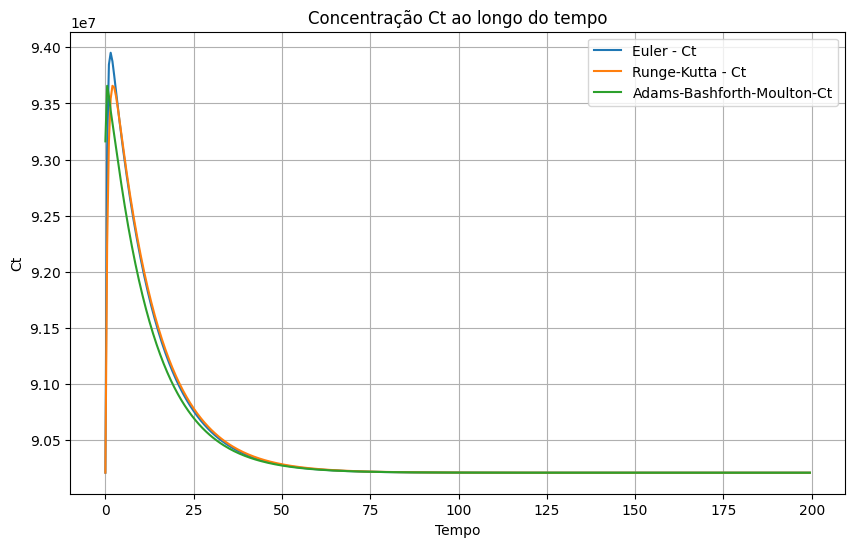

In [11]:
results_df = pd.read_csv('Artigo2_Results.csv')
#'Euler - Ct'
plt.figure(figsize=(10, 6))
plt.plot(results_df['Tempo'], results_df['Euler-Ct'], label='Euler - Ct')
plt.plot(results_df['Tempo'], results_df['Runge-Kutta-Ct'], label='Runge-Kutta - Ct')
# plt.plot(results_df['Tempo'], results_df['Adams_Bashforth-Ct'], label='Adams-Bashforth - Ct')
plt.plot(results_df['Tempo'], results_df['Adams_Bash_Moulton-Ct'], label='Adams-Bashforth-Moulton-Ct')
plt.xlabel('Tempo')
plt.ylabel('Ct')
plt.legend()
plt.grid(True)
plt.title('Concentração Ct ao longo do tempo')
plt.show()

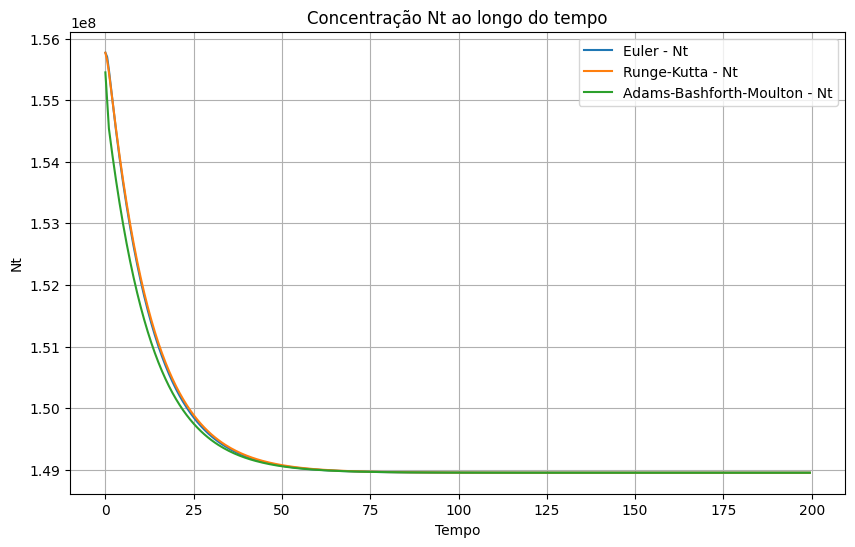

In [12]:
results_df = pd.read_csv('Artigo2_Results.csv')
#'Euler - Ct'
plt.figure(figsize=(10, 6))
plt.plot(results_df['Tempo'], results_df['Euler-Nt'], label='Euler - Nt')
plt.plot(results_df['Tempo'], results_df['Runge-Kutta-Nt'], label='Runge-Kutta - Nt')
# plt.plot(results_df['Tempo'], results_df['Adams_Bashforth-Nt'], label='Adams-Bashforth - Nt')
plt.plot(results_df['Tempo'], results_df['Adams_Bash_Moulton-Nt'], label='Adams-Bashforth-Moulton - Nt')
plt.xlabel('Tempo')
plt.ylabel('Nt')
plt.legend()
plt.grid(True)
plt.title('Concentração Nt ao longo do tempo')
plt.show()

## Métodos vs Analítica

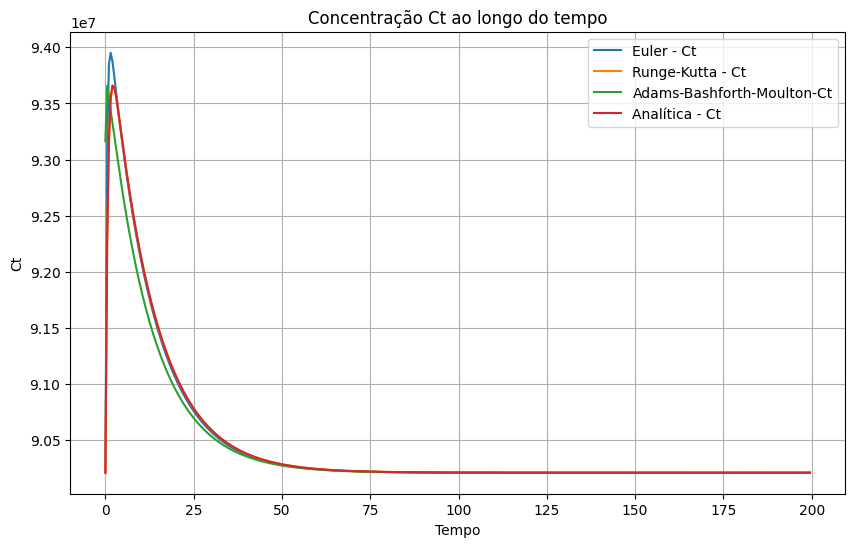

In [13]:
results_df = pd.read_csv('Artigo2_Results.csv')
#'Euler - Ct'
plt.figure(figsize=(10, 6))
plt.plot(results_df['Tempo'], results_df['Euler-Ct'], label='Euler - Ct')
plt.plot(results_df['Tempo'], results_df['Runge-Kutta-Ct'], label='Runge-Kutta - Ct')
# plt.plot(results_df['Tempo'], results_df['Adams_Bashforth-Ct'], label='Adams-Bashforth - Ct')
plt.plot(results_df['Tempo'], results_df['Adams_Bash_Moulton-Ct'], label='Adams-Bashforth-Moulton-Ct')
plt.plot(results_df['Tempo'], results_df['Analítica - Ct'], label='Analítica - Ct')
plt.xlabel('Tempo')
plt.ylabel('Ct')
plt.legend()
plt.grid(True)
plt.title('Concentração Ct ao longo do tempo')
plt.show()

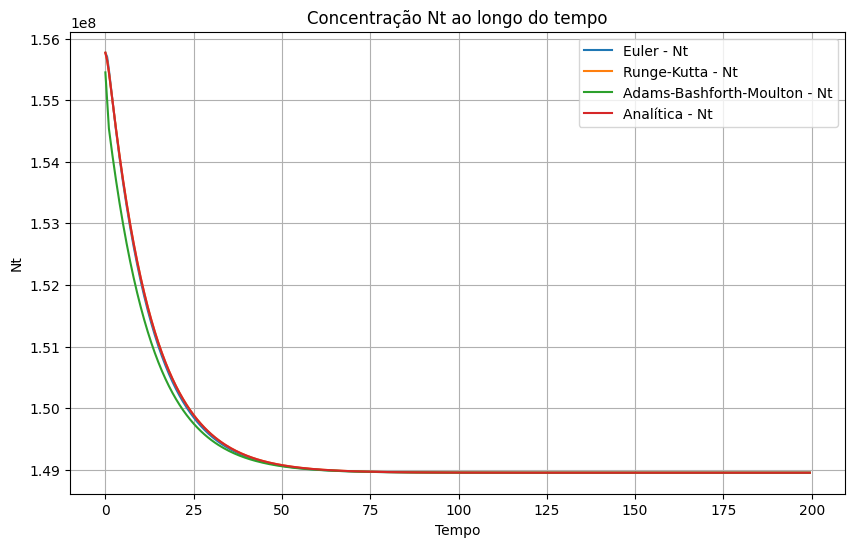

In [14]:
results_df = pd.read_csv('Artigo2_Results.csv')
#'Euler - Ct'
plt.figure(figsize=(10, 6))
plt.plot(results_df['Tempo'], results_df['Euler-Nt'], label='Euler - Nt')
plt.plot(results_df['Tempo'], results_df['Runge-Kutta-Nt'], label='Runge-Kutta - Nt')
# plt.plot(results_df['Tempo'], results_df['Adams_Bashforth-Nt'], label='Adams-Bashforth - Nt')
plt.plot(results_df['Tempo'], results_df['Adams_Bash_Moulton-Nt'], label='Adams-Bashforth-Moulton - Nt')
plt.plot(results_df['Tempo'], results_df['Analítica - Nt'], label='Analítica - Nt')
plt.xlabel('Tempo')
plt.ylabel('Nt')
plt.legend()
plt.grid(True)
plt.title('Concentração Nt ao longo do tempo')
plt.show()